# Group Work Project Submission 2 - Module 5 - Group 15

# 1. Data Importing

## 1.1 From the previous assignment, re-import the data from the csv file

In [ ]:
from urllib.request import install_opener
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
!pip install arch
from arch import arch_model
import seaborn as sb
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import mixture
from scipy.stats import multivariate_normal
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVC
from sklearn.svm import SVR

In [ ]:
dframe = pd.read_csv('MScFE 650 MLF GWP Data.csv',index_col ="Date")
dframe.head()

LUXXX  MSCI ARGENTINA  ...  MSCI UK  MSCI USA
Date                                 ...                   
1-Jan-16   1390.716         2376.29  ...  1818.40   1949.70
8-Jan-16   1291.267         2260.85  ...  1722.00   1831.88
15-Jan-16  1257.086         2217.50  ...  1692.43   1789.56
22-Jan-16  1254.167         2281.98  ...  1719.61   1814.12
29-Jan-16  1298.240         2462.19  ...  1774.40   1843.88

[5 rows x 35 columns]

# 2. Average Data Summaries

## 2.1 Calculate the mean of each series

In [ ]:
dframe.mean()

LUXXX                      1457.231905
MSCI ARGENTINA             2526.652262
BLP ORIENTE MEDIO          3029.482978
MSCI AUSTRALIA             1183.940159
MSCI AUSTRIA                127.418889
MSCI BELGIUM                 91.290238
MSCI BRAZIL                1813.989167
MSCI CANADA                1970.821627
MSCI CHINA                   76.788214
MSCI DENMARK               8447.657738
MSCI EM ASIA                509.413056
MSCI EM EU-MIDE-AFRICA      247.079409
MSCI EM EUROPE              304.084643
MSCI EM LATIN AMERICA      2502.462738
MSCI FINLAND                121.925278
MSCI FRANCE                 145.765476
MSCI GERMANY                143.522897
MSCI HONG KONG            14216.931151
MSCI INDIA                 1187.467976
MSCI ITALY                   55.799127
MSCI JAPAN                  943.752143
MSCI KOREA                  647.381905
MSCI MEXICO                4875.085000
MSCI NETHERLANDS            141.988175
MSCI NEW ZEALAND            145.904444
MSCI NORWAY              

In [ ]:
columns = dframe.columns

2.2 Calculate the trimmed mean of each series, where trim=5% 

In [ ]:
stats.trim_mean(dframe, 0.05, axis = 0)

array([ 1467.80062281,  2510.84807018,  3054.05824693,  1183.27605263,
         127.51929825,    92.04377193,  1829.17298246,  1977.83035088,
          76.86192982,  8378.56302632,   510.59675439,   247.29142982,
         304.36464912,  2519.50013158,   122.29482456,   145.74372807,
         143.89929825, 14251.03065789,  1190.83460526,    55.86135965,
         945.63451754,   648.34741228,  4908.4002193 ,   141.98302632,
         144.70925439,  2728.34780702,  1470.9120614 ,   594.61048246,
        1618.83886053,  1350.33850877,   107.11710526, 12385.66368421,
        1205.72469298,  2023.13149123,  2521.96662281])

2.3 Calculate the trimmed mean of each series, where trim=50%.  This is also called the median

In [ ]:
dframe.median()

LUXXX                      1491.08100
MSCI ARGENTINA             2541.97500
BLP ORIENTE MEDIO          3113.41405
MSCI AUSTRALIA             1177.37500
MSCI AUSTRIA                130.63500
MSCI BELGIUM                 95.01500
MSCI BRAZIL                1860.96000
MSCI CANADA                1990.63000
MSCI CHINA                   78.71000
MSCI DENMARK               8227.80500
MSCI EM ASIA                517.31000
MSCI EM EU-MIDE-AFRICA      251.16550
MSCI EM EUROPE              306.43000
MSCI EM LATIN AMERICA      2598.95500
MSCI FINLAND                124.12000
MSCI FRANCE                 147.93000
MSCI GERMANY                144.64500
MSCI HONG KONG            14342.61000
MSCI INDIA                 1230.79000
MSCI ITALY                   55.96000
MSCI JAPAN                  953.66000
MSCI KOREA                  649.64000
MSCI MEXICO                4948.77000
MSCI NETHERLANDS            143.67500
MSCI NEW ZEALAND            135.85000
MSCI NORWAY                2795.26500
MSCI PERU   

2.4 Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 averages

In [ ]:
sub_weight1 = 0.3
sub_weight2 = 0.5
sub_weight3 = 0.2

weights_total = sub_weight1*dframe.mean() + sub_weight2*stats.trim_mean(dframe, 0.05, axis = 0) + sub_weight3*dframe.median()

weights_total

LUXXX                      1469.286083
MSCI ARGENTINA             2521.814714
BLP ORIENTE MEDIO          3058.556827
MSCI AUSTRALIA             1182.295074
MSCI AUSTRIA                128.112316
MSCI BELGIUM                 92.411957
MSCI BRAZIL                1830.975241
MSCI CANADA                1978.287664
MSCI CHINA                   77.209429
MSCI DENMARK               8369.139835
MSCI EM ASIA                511.584294
MSCI EM EU-MIDE-AFRICA      248.002638
MSCI EM EUROPE              304.693717
MSCI EM LATIN AMERICA      2530.279887
MSCI FINLAND                122.548996
MSCI FRANCE                 146.187507
MSCI GERMANY                143.935518
MSCI HONG KONG            14259.116674
MSCI INDIA                 1197.815695
MSCI ITALY                   55.862418
MSCI JAPAN                  946.674902
MSCI KOREA                  648.316278
MSCI MEXICO                4906.479610
MSCI NETHERLANDS            142.322966
MSCI NEW ZEALAND            143.295961
MSCI NORWAY              

2.5 Rank the series, from highest expected return to lowest expected return using your weighted factor

In [ ]:
weights_total.sort_values(ascending = False)

MSCI HONG KONG            14259.116674
MSCI SWEDEN               12413.777556
MSCI DENMARK               8369.139835
MSCI MEXICO                4906.479610
BLP ORIENTE MEDIO          3058.556827
MSCI NORWAY                2739.406058
MSCI USA                   2530.733871
MSCI EM LATIN AMERICA      2530.279887
MSCI ARGENTINA             2521.814714
MSCI UK                    2031.861019
MSCI CANADA                1978.287664
MSCI BRAZIL                1830.975241
MSCI SINGAPORE             1628.141657
MSCI PERU                  1484.635376
LUXXX                      1469.286083
MSCI SOUTH AFRICA          1349.806695
MSCI SWITZERLAND           1204.249787
MSCI INDIA                 1197.815695
MSCI AUSTRALIA             1182.295074
MSCI JAPAN                  946.674902
MSCI KOREA                  648.316278
MSCI RUSSIA                 594.692563
MSCI EM ASIA                511.584294
MSCI EM EUROPE              304.693717
MSCI EM EU-MIDE-AFRICA      248.002638
MSCI FRANCE              

# Volatility Data Summaries

3.1 For the log return series, compute a EWMA

In [ ]:
log_return = 100*np.log(1 + dframe.pct_change()).dropna()
EWMA = log_return.ewm(span=250, adjust=False).mean()
EWMA

LUXXX  MSCI ARGENTINA  ...   MSCI UK  MSCI USA
Date                                 ...                    
8-Jan-16  -7.419482       -4.979960  ... -5.447059 -6.233275
15-Jan-16 -7.381739       -4.955706  ... -5.417458 -6.202232
22-Jan-16 -7.324772       -4.893379  ... -5.361596 -6.141950
29-Jan-16 -7.238888       -4.793824  ... -5.293882 -6.080045
5-Feb-16  -7.195830       -4.750233  ... -5.282612 -6.057579
...             ...             ...  ...       ...       ...
25-Sep-20 -1.275224       -0.971705  ... -0.896172 -0.686443
2-Oct-20  -1.226609       -0.933950  ... -0.881000 -0.668049
9-Oct-20  -1.187825       -0.869790  ... -0.859966 -0.632194
16-Oct-20 -1.183996       -0.857620  ... -0.868180 -0.625105
23-Oct-20 -1.157962       -0.855346  ... -0.867916 -0.624944

[251 rows x 35 columns]

3.2 For the log series, run a GARCH(1,1) model

In [ ]:
var_forcasts = []

var_forcasts = []
for i in range(0, len(columns)):
  garch_1_1 = arch_model(log_return.iloc[: , i], p = 1, q = 1,
                        mean = 'zero', vol = 'GARCH', dist = 'normal', rescale=False)
  # Fit the model
  garch_1_1_result = garch_1_1.fit(update_freq=5)
  forecast = garch_1_1_result.forecast(reindex=False)
  var_forcasts.append(forecast.variance['h.1'][0])

Iteration:      5,   Func. Count:     30,   Neg. LLF: 635.2342617211175
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 635.234108229889
            Iterations: 7
            Function evaluations: 40
            Gradient evaluations: 7
Iteration:      5,   Func. Count:     28,   Neg. LLF: 775.1323197181446
Iteration:     10,   Func. Count:     54,   Neg. LLF: 774.3472954303702
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 774.3472956934545
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     32,   Neg. LLF: 587.1054097725832
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 586.9631030853342
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     30,   Neg. LLF: 523.796706306428
Iteration:     1

In [ ]:
volatility_summary = pd.DataFrame({"ewma": EWMA, "garch1_1": var_forcasts})
                               
volatility_summary

ewma   garch1_1
0                                     (L, U, X, X, X)   9.744278
1          (M, S, C, I,  , A, R, G, E, N, T, I, N, A)  11.240886
2   (B, L, P,  , O, R, I, E, N, T, E,  , M, E, D, ...   4.241214
3          (M, S, C, I,  , A, U, S, T, R, A, L, I, A)   5.007807
4                (M, S, C, I,  , A, U, S, T, R, I, A)  10.155089
5                (M, S, C, I,  , B, E, L, G, I, U, M)   9.893719
6                   (M, S, C, I,  , B, R, A, Z, I, L)  18.119398
7                   (M, S, C, I,  , C, A, N, A, D, A)   2.109015
8                      (M, S, C, I,  , C, H, I, N, A)   7.498933
9                (M, S, C, I,  , D, E, N, M, A, R, K)   5.954073
10               (M, S, C, I,  , E, M,  , A, S, I, A)   5.499334
11  (M, S, C, I,  , E, M,  , E, U, -, M, I, D, E, ...   6.046505
12         (M, S, C, I,  , E, M,  , E, U, R, O, P, E)   8.378797
13  (M, S, C, I,  , E, M,  , L, A, T, I, N,  , A, ...  13.186664
14               (M, S, C, I,  , F, I, N, L, A, N, D)   4.365758
15                  (M, S, C, I,  , F, R, A, N, C, E)   4.744655
16               (M, S, C, I,  , G, E, R, M, A, N, Y)   6.088918
17         (M, S, C, I,  , H, O, N, G,  , K, O, N, G)   5.166367
18                     (M, S, C, I,  , I, N, D, I, A)   4.776052
19                     (M, S, C, I,  , I, T, A, L, Y)   4.890148
20                     (M, S, C, I,  , J, A, P, A, N)   3.789343
21                     (M, S, C, I,  , K, O, R, E, A)   5.112619
22                  (M, S, C, I,  , M, E, X, I, C, O)  15.193905
23   (M, S, C, I,  , N, E, T, H, E, R, L, A, N, D, S)   4.943560
24   (M, S, C, I,  , N, E, W,  , Z, E, A, L, A, N, D)   3.911719
25                  (M, S, C, I,  , N, O, R, W, A, Y)   3.527392
26                        (M, S, C, I,  , P, E, R, U)  10.348560
27                  (M, S, C, I,  , R, U, S, S, I, A)  10.699549
28         (M, S, C, I,  , S, I, N, G, A, P, O, R, E)   2.173815
29  (M, S, C, I,  , S, O, U, T, H,  , A, F, R, I, ...   4.770091
30                     (M, S, C, I,  , S, P, A, I, N)   5.665931
31                  (M, S, C, I,  , S, W, E, D, E, N)   3.238971
32   (M, S, C, I,  , S, W, I, T, Z, E, R, L, A, N, D)   3.045323
33                              (M, S, C, I,  , U, K)   3.849458
34                           (M, S, C, I,  , U, S, A)   3.573587

3.3 For the price series, compute the 1-month range (high price minus low price over past 4 weeks)

In [ ]:
one_month_range=dframe.rolling(4).max()-dframe.rolling(4).min().dropna()

one_month_range

LUXXX  MSCI ARGENTINA  ...  MSCI UK  MSCI USA
Date                               ...                   
1-Apr-16   38.793          102.55  ...    26.98     49.24
1-Dec-17   43.675          114.62  ...    37.88     58.67
1-Feb-19   49.780          166.67  ...    61.23    107.03
1-Jan-16      NaN             NaN  ...      NaN       NaN
1-Jul-16   56.723          119.18  ...   164.47     61.95
...           ...             ...  ...      ...       ...
9-Jun-17   39.891          321.72  ...    29.44     71.34
9-Mar-18   73.649          221.68  ...    67.28     91.19
9-Nov-18  139.050          294.37  ...    47.14    114.11
9-Oct-20   87.325          166.81  ...    47.85    178.90
9-Sep-16   22.468           52.37  ...    34.39     51.99

[252 rows x 35 columns]

In [ ]:
month_range_rank = one_month_range.mean(axis=0)
month_range_rank.head()

LUXXX                 73.464763
MSCI ARGENTINA       216.271285
BLP ORIENTE MEDIO    129.575322
MSCI AUSTRALIA        39.542570
MSCI AUSTRIA           6.687309
dtype: float64

3.4 Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 vol measures

In [ ]:
pr_ewma=0.35
pr_garch=0.25
pr_range=0.4

weighted_tot = volatility_summary.ewma*pr_ewma + volatility_summary.garch1_1*pr_garch + volatility_summary.one_month_range*pr_range
weighted_tot

3.5 Rank the series, from highest volatility to lowest volatility using your weighted factor.  For GARCH, use the unconditional variance as the average.  For EWMA and hi-minus-low, you may average the time series of volatilities to be able to get single-number summaries for each model.

In [ ]:
weighted_tot.sort_values()

# 4. Data Visualizing: Heat Maps

4.1 Write a Python function to compute a heat map of the correlations.
Be sure to show the scale using colors that range from blue for low values to red for high values.

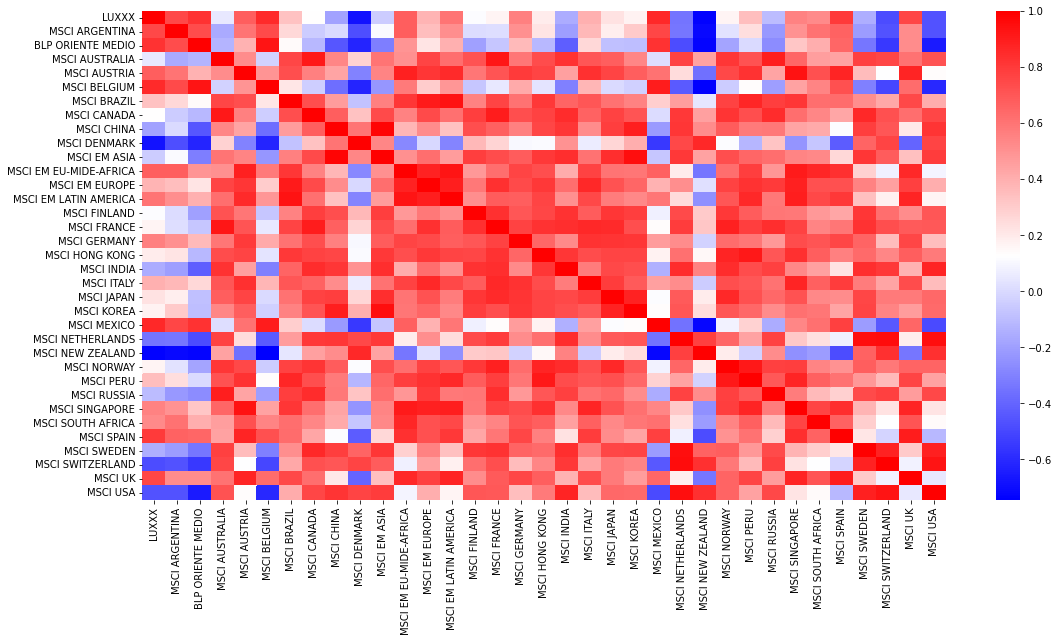

In [ ]:
import seaborn as sb

plt.figure(figsize=(18,9))
# plotting correlation heatmap for index
dataplot = sb.heatmap(dframe.corr(), cmap="bwr")
  
# displaying heatmap for index
plt.show()

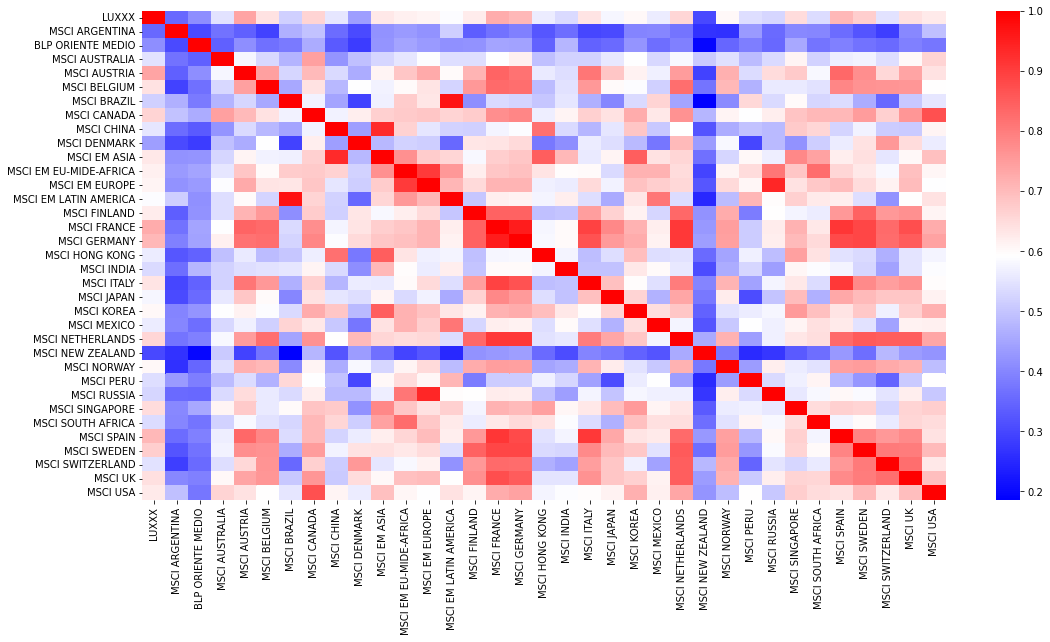

In [ ]:
import seaborn as sb

plt.figure(figsize=(18,9))
# plotting correlation heatmap for returns
dataplot = sb.heatmap(log_return.corr(), cmap="bwr")
  
# displaying heatmap for returns
plt.show()

# 6. Data Selection

6.1 Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).  You may choose the same one that your group used in the previous assignment.

In [ ]:
dframe = pd.read_csv('MScFE 650 MLF GWP Data.csv',parse_dates=['Date'])

y=dframe.LUXXX
y_return = np.log(y).diff().dropna()
print(y_return)

1     -0.074195
2     -0.026828
3     -0.002325
4      0.034538
5     -0.018352
         ...   
247   -0.062581
248    0.048259
249    0.036408
250   -0.007073
251    0.020832
Name: LUXXX, Length: 251, dtype: float64


In [ ]:
X=dframe.copy()
X.drop(columns=['Date', 'LUXXX'], inplace=True)
X_return=np.log(X).diff().dropna()

print(X.shape)
print(X_return)

(252, 34)
     MSCI ARGENTINA  BLP ORIENTE MEDIO  ...   MSCI UK  MSCI USA
1         -0.049800          -0.072093  ... -0.054471 -0.062333
2         -0.019360          -0.050760  ... -0.017321 -0.023373
3          0.028663          -0.060557  ...  0.015932  0.013631
4          0.076008           0.065606  ...  0.031365  0.016272
5          0.006768           0.030297  ... -0.038795 -0.032605
..              ...                ...  ...       ...       ...
247       -0.039489          -0.030012  ... -0.028733 -0.005265
248        0.037665           0.005954  ...  0.010080  0.016219
249        0.071181          -0.022938  ...  0.017587  0.038317
250        0.006575          -0.008932  ... -0.018909  0.002575
251       -0.005722          -0.004146  ... -0.008350 -0.006049

[251 rows x 34 columns]


# 7. Compare unsupervised and supervised

7.1 What is the difference between unsupervised learning and supervised learning?

A supervised learning algorithm learns from labeled training data and aids in the prediction of unexpected data outputs.

Unsupervised learning is a machine learning technique in which the model does not require supervision. Instead, you should let the model figure out what it needs to know on its own and is mostly concerned with unlabeled data.

7.2 Which is clustering?  Which is CART?  Which is SVM? 

Clustering is unsupervised learning.

CART is supervised learning.

SVM is supervised learning.


# 8. Compare and Contrast CART and SVM

8.1 What do the CART and SVM have in common?  Be specific as to how they cut the dimensional space

A Classification And Regression Tree (CART), is a predictive model, which explains how an outcome variable's values can be predicted based on other values. A CART output is a decision tree where each fork is a split in a predictor variable and each end node contains a prediction for the outcome variable.

Support Vector Machine (SVM), is a data-classification technique, for predictive analysis that allocates incoming data items to one of several designated groups.

Both CART and SVM are data-classification algorithms for predictive analysis that allocate fresh data items to one of the identified groups. 
Both CART and SVM tackle non-linear problems, have high accuracy, and can forecast events quickly.

8.2 How do the CART and SVM methodologies differ?

CART does not necessitate a lot of data preparation or require feature scaling or data centering whereas feature scaling is extremely important for SVM, and feature normalization is essential for a successful fit in SVM. 

CART is less susceptible to outliers, but SVM seeks the widest margin, which means it is influenced by data points in the margin, which could be outliers.

# 9. Classification and Regression Trees (CART)

## 9.1. Perform a Classification Tree, where the response is categorical: whether your return was higher or lower than the previous week.  (Ties can be ignored).  Choose a suitable depth of the tree, basing your result on cross-validation

In [ ]:
# Creating the dataset for the Classification Tree
data_cls = X_return.copy()
data_cls.insert(0, 'LUXXX', y_return)
data_cls.insert(0, 'LUXXX Ret Dir', (data_cls['LUXXX'] > data_cls['LUXXX'].shift()) * 1) # Response variable returning 1 if LUXXX return in a given week exceeds that of prev week and 0 otherwise
del data_cls['LUXXX']

data_cls

LUXXX Ret Dir  MSCI ARGENTINA  ...   MSCI UK  MSCI USA
1                0       -0.049800  ... -0.054471 -0.062333
2                1       -0.019360  ... -0.017321 -0.023373
3                1        0.028663  ...  0.015932  0.013631
4                1        0.076008  ...  0.031365  0.016272
5                0        0.006768  ... -0.038795 -0.032605
..             ...             ...  ...       ...       ...
247              0       -0.039489  ... -0.028733 -0.005265
248              1        0.037665  ...  0.010080  0.016219
249              0        0.071181  ...  0.017587  0.038317
250              0        0.006575  ... -0.018909  0.002575
251              1       -0.005722  ... -0.008350 -0.006049

[251 rows x 35 columns]

- Before we run the CART model, we write a function which splits the above dataset into training, cross-validation and test sets. 
- We keep the test set to 1/3 (i.e. 84 examples) of the total no. of training examples. 
- We also perform 5-fold cross-validation on the training set, in order to choose a suitable depth of the tree, before we run the final model on the test set. 
    - This means that 5 subsets of size 33/ 34 are taken from the training set, each of which serves as a cross validation set.
    - We train the model on the remaining training set for different depths and look at how the model's performance changes with different depth levels.
    - The above exercise is repeated 5 times for the various CV sets, after which we look at the depth levels across the various CV sets under which the model has delivered maximum performance.

The above approach has also been adoped for SVMs, to choose an appropriate level of regularisation (C parameter). 

In [ ]:
# Function to split data into train, cross-validation and test sets
def data_split(dataset, response_var, no_cvsets):

    from sklearn.model_selection import train_test_split    
    data_train, data_test = train_test_split(dataset, test_size = 1/3, shuffle = True, random_state = 1)

    y_test = data_test[response_var]
    X_test = data_test.loc[:, dataset.columns != response_var]
    
    y_train = data_train[response_var]
    X_train = data_train.loc[:, dataset.columns != response_var]
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = no_cvsets).split(data_train)
    kf

    training_subsets = {}
    cv_sets = {}

    X_train_subsets = {}
    y_train_subsets = {}

    X_cv_sets = {}
    y_cv_sets = {}

    for (i, j), k in zip(kf, range(1, no_cvsets+1)):
        training_subsets['Training Subset' + ' ' + str(k)] = data_train.iloc[i]
        cv_sets['CV Set' + ' ' + str(k)] = data_train.iloc[j]

        X_train_subsets['X Train' + ' ' + str(k)] = training_subsets['Training Subset' + ' ' + str(k)].loc[:, training_subsets['Training Subset' + ' ' + str(k)].columns != response_var]
        y_train_subsets['y Train' + ' ' + str(k)] = training_subsets['Training Subset' + ' ' + str(k)][response_var]

        X_cv_sets['X CV' + ' ' + str(k)] = cv_sets['CV Set' + ' ' + str(k)].loc[:, cv_sets['CV Set' + ' ' + str(k)].columns != response_var]
        y_cv_sets['y CV' + ' ' + str(k)] = cv_sets['CV Set' + ' ' + str(k)][response_var]
    
    return y_test, X_test, y_train, X_train, training_subsets, cv_sets, X_train_subsets, y_train_subsets, X_cv_sets, y_cv_sets

In [ ]:
y_test_cls, X_test_cls, y_train_cls, X_train_cls, training_subsets_cls, cv_sets_cls, X_train_subsets_cls, y_train_subsets_cls, X_cv_sets_cls, y_cv_sets_cls = data_split(data_cls, 'LUXXX Ret Dir', 5)

In [ ]:
# Running the Classification Tree model with various depths for the 5 training subsets and CV sets
from sklearn.tree import DecisionTreeClassifier
no_cvsets = 5
depths_scores_cls = {}

for s in range(1, no_cvsets+1):
    
    depths_scores_cls['Set ' + str(s)] = np.zeros((10, 2))
    
    for d in range(1, 11):
        tree_cls = DecisionTreeClassifier(criterion = 'gini', max_depth = d, random_state = 1)
        tree_cls.fit(X_train_subsets_cls['X Train ' + str(s)], y_train_subsets_cls['y Train ' + str(s)])

        depths_scores_cls['Set ' + str(s)][d-1, 0] = tree_cls.get_depth()
        depths_scores_cls['Set ' + str(s)][d-1, 1] = tree_cls.score(X_cv_sets_cls['X CV ' + str(s)], y_cv_sets_cls['y CV ' + str(s)])
        
depths_scores_cls

{'Set 1': array([[1.        , 0.64705882],
        [2.        , 0.70588235],
        [3.        , 0.55882353],
        [4.        , 0.64705882],
        [5.        , 0.58823529],
        [6.        , 0.55882353],
        [7.        , 0.5       ],
        [8.        , 0.52941176],
        [8.        , 0.52941176],
        [8.        , 0.52941176]]), 'Set 2': array([[1.        , 0.64705882],
        [2.        , 0.61764706],
        [3.        , 0.52941176],
        [4.        , 0.5       ],
        [5.        , 0.5       ],
        [6.        , 0.52941176],
        [7.        , 0.5       ],
        [8.        , 0.44117647],
        [9.        , 0.44117647],
        [9.        , 0.44117647]]), 'Set 3': array([[1.        , 0.6969697 ],
        [2.        , 0.48484848],
        [3.        , 0.54545455],
        [4.        , 0.51515152],
        [5.        , 0.48484848],
        [6.        , 0.51515152],
        [7.        , 0.48484848],
        [8.        , 0.57575758],
        [8.        

In [ ]:
# Summary of the performance-maximising/ optimal depths for various training subsets and CV sets
depth_summary_cls = pd.DataFrame(columns = ['Cross-validation Set', 'Optimal Depth(s)', 'Maximum Prediction Score'])

for s in range(1, no_cvsets+1):
    idx_cls = np.where(depths_scores_cls['Set ' + str(s)][:, 1] == np.amax(depths_scores_cls['Set ' + str(s)][:, 1]))[0]
    depth_summary_cls.loc[len(depth_summary_cls)] = ['Set ' + str(s), depths_scores_cls['Set ' + str(s)][idx_cls, 0], max(depths_scores_cls['Set ' + str(s)][:, 1])]
    #print(idx_cls, depths_scores_cls['Set ' + str(s)][idx_cls, 0])
    
depth_summary_cls

Cross-validation Set Optimal Depth(s)  Maximum Prediction Score
0                Set 1            [2.0]                  0.705882
1                Set 2            [1.0]                  0.647059
2                Set 3            [1.0]                  0.696970
3                Set 4       [2.0, 3.0]                  0.696970
4                Set 5            [4.0]                  0.848485

As shown above, depths 1-4 maximise model performance on the 5 CV sets. We choose to train our model with depths 2 and 3. Depths 1 and 4 are ignored to avoid under- and over-fitting respectively.

In [ ]:
# Classification tree with depth 3 trained on the original training set
tree_cls3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)
tree_cls3.fit(X_train_cls, y_train_cls)
print("Prediction accuracy of classification tree with depth 3 on the test set:", "{:.3%}".format(tree_cls3.score(X_test_cls, y_test_cls)))

Prediction accuracy of classification tree with depth 3 on the test set: 64.286%


In [ ]:
# Classification tree with depth 2 trained on the original training set
tree_cls2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 1)
tree_cls2.fit(X_train_cls, y_train_cls)
print("Prediction accuracy of classification tree with depth 2 on the test set:", "{:.3%}".format(tree_cls2.score(X_test_cls, y_test_cls)))

Prediction accuracy of classification tree with depth 2 on the test set: 69.048%


## 9.2. Perform a Regression Tree.  The difference here is the response is continuous.  This value should be the weekly return that you calculated on each series. Choose a suitable depth of the tree, basing your result on cross-validation

In [ ]:
# Creating the dataset for the Regression Tree
data_reg = X_return.copy()
data_reg.insert(0, 'LUXXX', y_return)
data_reg

LUXXX  MSCI ARGENTINA  ...   MSCI UK  MSCI USA
1   -0.074195       -0.049800  ... -0.054471 -0.062333
2   -0.026828       -0.019360  ... -0.017321 -0.023373
3   -0.002325        0.028663  ...  0.015932  0.013631
4    0.034538        0.076008  ...  0.031365  0.016272
5   -0.018352        0.006768  ... -0.038795 -0.032605
..        ...             ...  ...       ...       ...
247 -0.062581       -0.039489  ... -0.028733 -0.005265
248  0.048259        0.037665  ...  0.010080  0.016219
249  0.036408        0.071181  ...  0.017587  0.038317
250 -0.007073        0.006575  ... -0.018909  0.002575
251  0.020832       -0.005722  ... -0.008350 -0.006049

[251 rows x 35 columns]

In [ ]:
y_test_reg, X_test_reg, y_train_reg, X_train_reg, training_subsets_reg, cv_sets_reg, X_train_subsets_reg, y_train_subsets_reg, X_cv_sets_reg, y_cv_sets_reg = data_split(data_reg, 'LUXXX', 5)

In [ ]:
# Running the Regression Tree model with various depths for the 5 training subsets and CV sets
from sklearn.tree import DecisionTreeRegressor

depths_scores_reg = {}

for s in range(1, no_cvsets+1):
    
    depths_scores_reg['Set ' + str(s)] = np.zeros((10, 2))
    
    for d in range(1, 11):
        tree_reg = DecisionTreeRegressor(criterion = 'squared_error', max_depth = d, random_state = 1)
        tree_reg.fit(X_train_subsets_reg['X Train ' + str(s)], y_train_subsets_reg['y Train ' + str(s)])

        depths_scores_reg['Set ' + str(s)][d-1, 0] = tree_reg.get_depth()
        depths_scores_reg['Set ' + str(s)][d-1, 1] = tree_reg.score(X_cv_sets_reg['X CV ' + str(s)], y_cv_sets_reg['y CV ' + str(s)])
        
depths_scores_reg

{'Set 1': array([[ 1.        ,  0.1143671 ],
        [ 2.        ,  0.37959813],
        [ 3.        ,  0.07945681],
        [ 4.        , -0.06871143],
        [ 5.        , -0.0331198 ],
        [ 6.        ,  0.01769803],
        [ 7.        , -0.12660943],
        [ 8.        , -0.0620796 ],
        [ 9.        , -0.07548361],
        [10.        , -0.07030755]]),
 'Set 2': array([[ 1.00000000e+00, -1.15723920e-01],
        [ 2.00000000e+00,  1.89721747e-01],
        [ 3.00000000e+00,  3.12848870e-01],
        [ 4.00000000e+00,  3.52629856e-01],
        [ 5.00000000e+00,  3.48180198e-01],
        [ 6.00000000e+00,  1.92873146e-01],
        [ 7.00000000e+00,  1.25298178e-01],
        [ 8.00000000e+00, -2.83973144e-03],
        [ 9.00000000e+00,  9.53376200e-03],
        [ 1.00000000e+01,  4.31365541e-02]]),
 'Set 3': array([[ 1.        , -0.58570714],
        [ 2.        , -0.18410509],
        [ 3.        , -0.16863608],
        [ 4.        , -0.27935867],
        [ 5.        , -0.

In [ ]:
# Summary of the performance-maximising/ optimal depths for various training subsets and CV sets
depth_summary_reg = pd.DataFrame(columns = ['Cross-validation Set', 'Optimal Depth(s)', 'Maximum Prediction Score'])

for s in range(1, no_cvsets+1):
    idx_reg = np.where(depths_scores_reg['Set ' + str(s)][:, 1] == np.amax(depths_scores_reg['Set ' + str(s)][:, 1]))[0]
    depth_summary_reg.loc[len(depth_summary_reg)] = ['Set ' + str(s), depths_scores_reg['Set ' + str(s)][idx_reg, 0], max(depths_scores_reg['Set ' + str(s)][:, 1])]
    
depth_summary_reg

Cross-validation Set Optimal Depth(s)  Maximum Prediction Score
0                Set 1            [2.0]                  0.379598
1                Set 2            [4.0]                  0.352630
2                Set 3            [7.0]                 -0.154288
3                Set 4            [2.0]                  0.233899
4                Set 5            [4.0]                  0.302590

We choose to train our model with depths 2 and 4. Depth 7 is ignored as it would make the model too granualar and prone to overfitting the training set.

In [ ]:
# Regression tree with depth 4 trained on the original training set
tree_reg4 = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 4, random_state = 1)
tree_reg4.fit(X_train_reg, y_train_reg)
print("Prediction accuracy of regression tree with depth 4 on the test set:", "{:.3%}".format(tree_reg4.score(X_test_reg, y_test_reg)))

Prediction accuracy of regression tree with depth 4 on the test set: 25.475%


In [ ]:
# Regression tree with depth 2 trained on the original training set
tree_reg2 = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 2, random_state = 1)
tree_reg2.fit(X_train_reg, y_train_reg)
print("Prediction accuracy of regression tree with depth 2 on the test set:", "{:.3%}".format(tree_reg2.score(X_test_reg, y_test_reg)))

Prediction accuracy of regression tree with depth 2 on the test set: 31.312%


## 9.3. Which performed better, the classification or the regression tree?

Clearly, the prediction accuracy for the classification tree exceeds that for the regression tree. Although we have run the two models for different depths, the classification tree also outperforms the regression tree when their depths are the same.

# 10. Support Vector Machines (SVM)

## 10.1. Instead of running a regression tree, use SVM. Use the original space of 35 variables

In [ ]:
# Creating the dataset for SVM
data_svm = X_return.copy()
data_svm.insert(0, 'LUXXX', y_return)
data_svm.insert(0, 'LUXXX Ret Dir', (data_svm['LUXXX'] > data_svm['LUXXX'].shift()) * 1)

data_svm

LUXXX Ret Dir     LUXXX  ...   MSCI UK  MSCI USA
1                0 -0.074195  ... -0.054471 -0.062333
2                1 -0.026828  ... -0.017321 -0.023373
3                1 -0.002325  ...  0.015932  0.013631
4                1  0.034538  ...  0.031365  0.016272
5                0 -0.018352  ... -0.038795 -0.032605
..             ...       ...  ...       ...       ...
247              0 -0.062581  ... -0.028733 -0.005265
248              1  0.048259  ...  0.010080  0.016219
249              0  0.036408  ...  0.017587  0.038317
250              0 -0.007073  ... -0.018909  0.002575
251              1  0.020832  ... -0.008350 -0.006049

[251 rows x 36 columns]

As requested in the question, we run a SVM with LUXXX Weekly Return Direction as the response and all 35 variables (including LUXXX return) as the predictors. This has been reflected in the dataset above.

In [ ]:
y_test_svm, X_test_svm, y_train_svm, X_train_svm, training_subsets_svm, cv_sets_svm, X_train_subsets_svm, y_train_subsets_svm, X_cv_sets_svm, y_cv_sets_svm = data_split(data_svm, 'LUXXX Ret Dir', 5)

For the SVM to fit the training set well, we implement feature scaling across all 35 predictors before feeding them into the model.

In [ ]:
def feature_scaler(dataset): #Pass a dataframe
    from sklearn.preprocessing import StandardScaler
    dataset_scaled = StandardScaler().fit_transform(dataset)
    dataset_scaled = pd.DataFrame(dataset_scaled, columns = dataset.columns)
    return dataset_scaled

In [ ]:
# Running the SVM with a linear kernel (equivalent to no kernel) and with various regularisation parameter values for the 5 training subsets and CV sets
from sklearn.svm import SVC
C_vals = np.arange(0.5, 5.5, 0.5)
C_scores = {}

for s in range(1, no_cvsets + 1):
    C_scores['Set ' + str(s)] = np.zeros((10, 2))
    
    X_train_scaled = feature_scaler(X_train_subsets_svm['X Train ' + str(s)])
    X_cv_scaled = feature_scaler(X_cv_sets_svm['X CV ' + str(s)])
    
    for c in C_vals:
        
        model_svm = SVC(C = c, kernel = 'linear')
        model_svm.fit(X_train_scaled, y_train_subsets_svm['y Train ' + str(s)])

        idx = np.where(C_vals == c)[0][0]
        C_scores['Set ' + str(s)][idx, 0] = c
        C_scores['Set ' + str(s)][idx, 1] = model_svm.score(X_cv_scaled, y_cv_sets_svm['y CV ' + str(s)])
    
C_scores    

{'Set 1': array([[0.5       , 0.67647059],
        [1.        , 0.67647059],
        [1.5       , 0.67647059],
        [2.        , 0.67647059],
        [2.5       , 0.70588235],
        [3.        , 0.67647059],
        [3.5       , 0.67647059],
        [4.        , 0.67647059],
        [4.5       , 0.67647059],
        [5.        , 0.67647059]]), 'Set 2': array([[0.5       , 0.55882353],
        [1.        , 0.64705882],
        [1.5       , 0.61764706],
        [2.        , 0.67647059],
        [2.5       , 0.64705882],
        [3.        , 0.67647059],
        [3.5       , 0.67647059],
        [4.        , 0.67647059],
        [4.5       , 0.67647059],
        [5.        , 0.67647059]]), 'Set 3': array([[0.5       , 0.72727273],
        [1.        , 0.81818182],
        [1.5       , 0.81818182],
        [2.        , 0.78787879],
        [2.5       , 0.78787879],
        [3.        , 0.84848485],
        [3.5       , 0.81818182],
        [4.        , 0.81818182],
        [4.5       

In [ ]:
# Summary of the performance-maximising/ optimal C values for various training subsets and CV sets
C_summary = pd.DataFrame(columns = ['Cross-validation Set', 'Optimal C Val', 'Max Prediction Score'])

for s in range(1, no_cvsets+1):
    idx_svm = np.where(C_scores['Set ' + str(s)][:, 1] == np.amax(C_scores['Set ' + str(s)][:, 1]))[0]
    C_summary.loc[len(C_summary)] = ['Set ' + str(s), C_scores['Set ' + str(s)][idx_svm, 0], max(C_scores['Set ' + str(s)][:, 1])]

C_summary

Cross-validation Set                   Optimal C Val  Max Prediction Score
0                Set 1                           [2.5]              0.705882
1                Set 2  [2.0, 3.0, 3.5, 4.0, 4.5, 5.0]              0.676471
2                Set 3                           [3.0]              0.848485
3                Set 4                           [0.5]              0.757576
4                Set 5                           [2.0]              0.696970

We choose to train our model with 2.0 and 2.5 as choices for the C parameter. Across all 5 subsets, these values of C have yielded the maximum prediction score or a score near the maximum (ref. to the numpy arrays above). Choosing a C parameter below or above these values may lead to too much or too little regularisation and therefore under- or over-fitting respectively.

In [ ]:
# SVM with C = 2.0 trained on the original training set
svm_c2pt0 = SVC(C = 2.0, kernel = 'linear')
svm_c2pt0.fit(X_train_svm, y_train_svm)
print("Prediction accuracy of SVM with C = 2.0 on the test set:", "{:.3%}".format(svm_c2pt0.score(X_test_svm, y_test_svm)))

Prediction accuracy of SVM with C = 2.0 on the test set: 79.762%


In [ ]:
# SVM with C = 2.5 trained on the original training set
svm_c2pt5 = SVC(C = 2.5, kernel = 'linear')
svm_c2pt5.fit(X_train_svm, y_train_svm)
print("Prediction accuracy of SVM with C = 2.0 on the test set:", "{:.3%}".format(svm_c2pt5.score(X_test_svm, y_test_svm)))

Prediction accuracy of SVM with C = 2.0 on the test set: 77.381%


## 10.2. Choose a kernel.  Rerun the SVM.

In [ ]:
# Re-running the SVM with an RBF kernel and with various regularisation parameter values for the 5 training subsets and CV sets
C_vals = np.arange(0.5, 5.5, 0.5)
C_scores = {}

for s in range(1, no_cvsets + 1):
    C_scores['Set ' + str(s)] = np.zeros((10, 2))
    
    X_train_scaled = feature_scaler(X_train_subsets_svm['X Train ' + str(s)])
    X_cv_scaled = feature_scaler(X_cv_sets_svm['X CV ' + str(s)])
    
    for c in C_vals:
        
        model_svm = SVC(C = c, kernel = 'rbf')
        model_svm.fit(X_train_scaled, y_train_subsets_svm['y Train ' + str(s)])

        idx = np.where(C_vals == c)[0][0]
        C_scores['Set ' + str(s)][idx, 0] = c
        C_scores['Set ' + str(s)][idx, 1] = model_svm.score(X_cv_scaled, y_cv_sets_svm['y CV ' + str(s)])
    
C_scores    

{'Set 1': array([[0.5       , 0.61764706],
        [1.        , 0.61764706],
        [1.5       , 0.64705882],
        [2.        , 0.58823529],
        [2.5       , 0.58823529],
        [3.        , 0.61764706],
        [3.5       , 0.64705882],
        [4.        , 0.64705882],
        [4.5       , 0.64705882],
        [5.        , 0.61764706]]), 'Set 2': array([[0.5       , 0.64705882],
        [1.        , 0.64705882],
        [1.5       , 0.67647059],
        [2.        , 0.64705882],
        [2.5       , 0.64705882],
        [3.        , 0.61764706],
        [3.5       , 0.61764706],
        [4.        , 0.61764706],
        [4.5       , 0.61764706],
        [5.        , 0.61764706]]), 'Set 3': array([[0.5       , 0.57575758],
        [1.        , 0.63636364],
        [1.5       , 0.66666667],
        [2.        , 0.72727273],
        [2.5       , 0.72727273],
        [3.        , 0.72727273],
        [3.5       , 0.6969697 ],
        [4.        , 0.6969697 ],
        [4.5       

In [ ]:
# Summary of the performance-maximising/ optimal C values for various training subsets and CV sets
C_summary = pd.DataFrame(columns = ['Cross-validation Set', 'Optimal C Val', 'Max Prediction Score'])

for s in range(1, no_cvsets+1):
    idx_svm = np.where(C_scores['Set ' + str(s)][:, 1] == np.amax(C_scores['Set ' + str(s)][:, 1]))[0]
    C_summary.loc[len(C_summary)] = ['Set ' + str(s), C_scores['Set ' + str(s)][idx_svm, 0], max(C_scores['Set ' + str(s)][:, 1])]

C_summary

Cross-validation Set         Optimal C Val  Max Prediction Score
0                Set 1  [1.5, 3.5, 4.0, 4.5]              0.647059
1                Set 2                 [1.5]              0.676471
2                Set 3       [2.0, 2.5, 3.0]              0.727273
3                Set 4                 [2.0]              0.818182
4                Set 5       [0.5, 4.5, 5.0]              0.727273

In [ ]:
# SVM with C = 1.5 trained on the original training set
svmrbf_c1pt5 = SVC(C = 1.5, kernel = 'rbf')
svmrbf_c1pt5.fit(X_train_svm, y_train_svm)
print("Prediction accuracy of SVM with C = 2.0 on the test set:", "{:.3%}".format(svmrbf_c1pt5.score(X_test_svm, y_test_svm)))

Prediction accuracy of SVM with C = 2.0 on the test set: 70.238%


In [ ]:
# SVM with C = 2.0 trained on the original training set
svm_c2pt0 = SVC(C = 2.0, kernel = 'rbf')
svm_c2pt0.fit(X_train_svm, y_train_svm)
print("Prediction accuracy of SVM with C = 2.0 on the test set:", "{:.3%}".format(svm_c2pt0.score(X_test_svm, y_test_svm)))

Prediction accuracy of SVM with C = 2.0 on the test set: 66.667%


## 10.3. Compare the results of the 2 SVMs.  Comment on how well the data is linearly separable.

The SVM with a linear kernel (i.e. no kernel) outperforms the SVM with an RBF kernel.

Regarding linear separability, graphically, two differently labelled datasets are perfectly linearly separable if there exist a line, plane or hyperplane that separates them (depending on the number of dimensions of our data).

SVMs with linear kernel find the longest margin that separates train data. If we set the C hyperparameter to a very high number (e.g. 10^7), we will force the optimizer to make 0 error in classification in order to minimize the loss function. Thus, we will overfit the data. If we can overfit it with a linear model, that means the data is linearly separable. We test this below.

In [ ]:
# SVM with C = 10^7 trained on the original training set
svm_clarge = SVC(C = 10000000, kernel = 'linear')
svm_clarge.fit(X_train_svm, y_train_svm)
print("Classification accuracy of SVM (linear kernel) with C = 10^7 on the training set:", "{:.3%}".format(svm_clarge.score(X_train_svm, y_train_svm)))

Classification accuracy of SVM (linear kernel) with C = 10^7 on the training set: 86.826%


Even with a large C value, the SVM is only able to classify about 87% of the datapoints in the training set correctly. So, the data is not perfectly linearly separable.